# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [ ]:
# 環境準備，使用 Python NumPy、Pandas、seaborn
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_HousingPricesPrediction/main/home-data-for-ml-course/train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
print('實驗資料大小:',df_train.shape)

實驗資料大小: (1460, 81)


In [ ]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_train.info()

#初步資訊:1、特徵值非常多 2、部分特徵空值很多

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2.數據清洗

In [ ]:
# 查看有那些缺值

# 創建一個DataFrame名字為Missing Number，裡面紀錄每個資料有多少空值，降冪排序
missing_train = pd.DataFrame({'Missing Number': df_train.isnull().sum().sort_values(ascending=False)})

# 刪除掉missing_train中Missing Number為0的index
missing_train = missing_train.drop(missing_train[missing_train['Missing Number']==0].index)

missing_train

,Missing Number
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [ ]:
# 資料過少參考價值不足，所以先刪除
df_train = df_train.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1)

# 再查看有那些缺值
missing_train = pd.DataFrame({'Missing Number': df_train.isnull().sum().sort_values(ascending=False)})
missing_train = missing_train.drop(missing_train[missing_train['Missing Number']==0].index)

missing_train

,Missing Number
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81
GarageQual,81
BsmtFinType2,38
BsmtExposure,38
BsmtFinType1,37
BsmtCond,37


In [ ]:
# 查看LotFrontage資料分佈狀況
df_train['LotFrontage'].value_counts()

# 60占大多數，所以用60填充缺值

,count
LotFrontage,
60.0,143
70.0,70
80.0,69
50.0,57
75.0,53
...,...
137.0,1
141.0,1
38.0,1


In [ ]:
# 對LotFrontage缺失值進行處理，利用60填充缺失值
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(60)
df_train['LotFrontage'].head()

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0


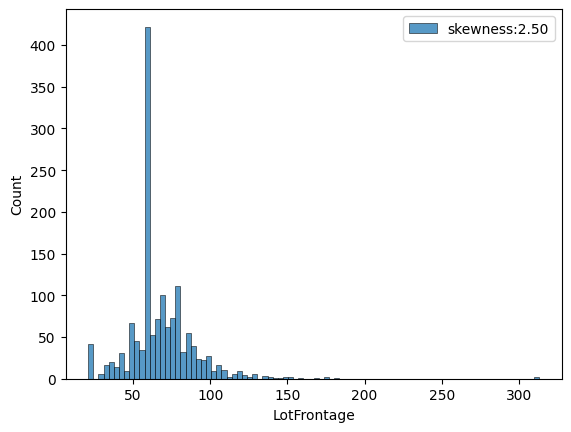

In [ ]:
# 查看LotFrontage分佈
LotFrontagePlot = sb.histplot(df_train['LotFrontage'][df_train['LotFrontage'].notnull()],label='skewness:%.2f'%(df_train['LotFrontage'].skew()))
LotFrontagePlot.legend(loc='best')

# 有偏態的趨勢

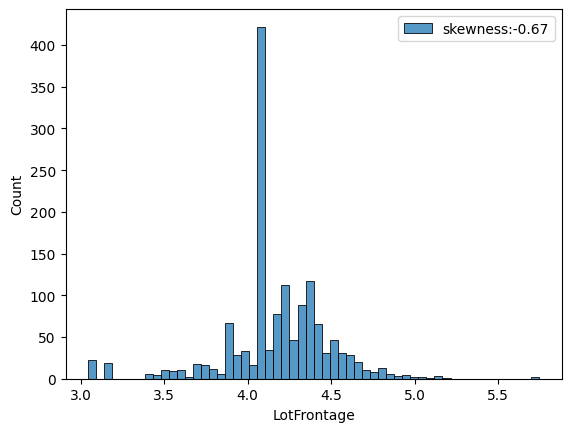

In [ ]:
# 對數化處理LotFrontage值
df_train['LotFrontage'] = df_train['LotFrontage'].map(lambda x: np.log(x) if x>0 else 0)

# 查看LotFrontage分佈
LotFrontagePlot = sb.histplot(df_train['LotFrontage'][df_train['LotFrontage'].notnull()],label='skewness:%.2f'%(df_train['LotFrontage'].skew()))
LotFrontagePlot.legend(loc='best')

# 結論: 調整後的圖形較為合理

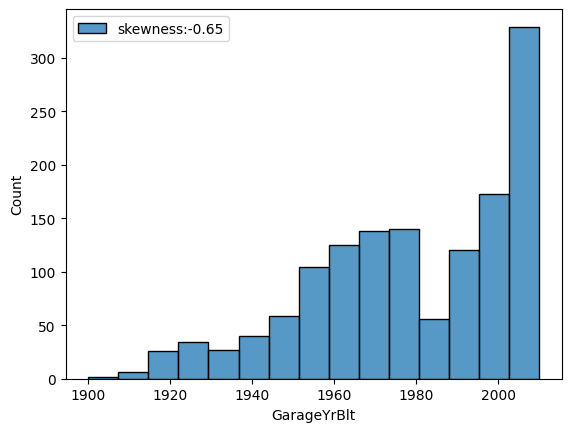

In [ ]:
# 查看GarageYrBlt分佈
GarageYrBltPlot = sb.histplot(df_train['GarageYrBlt'][df_train['GarageYrBlt'].notnull()],label='skewness:%.2f'%(df_train['GarageYrBlt'].skew()))
GarageYrBltPlot.legend(loc='best')

# 微偏態

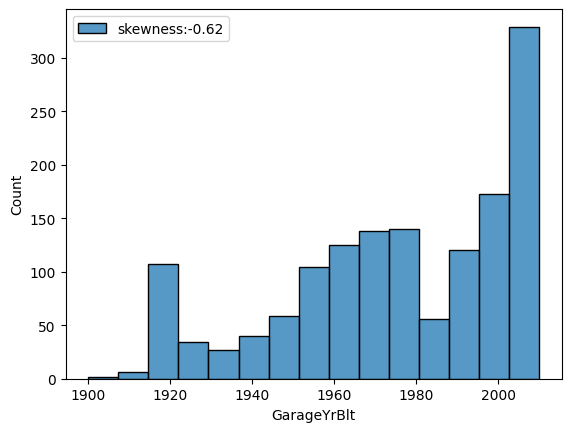

In [ ]:
# 推測GarageYrBlt(車庫建成年份)遺失可能原因為年代久遠，因此補值一個久遠一點的年份1920
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(1920)

# 查看GarageYrBlt分佈
GarageYrBltPlot = sb.histplot(df_train['GarageYrBlt'][df_train['GarageYrBlt'].notnull()],label='skewness:%.2f'%(df_train['GarageYrBlt'].skew()))
GarageYrBltPlot.legend(loc='best')

In [ ]:
# 查看MasVnrArea(磚石飾面面積（平方英尺）)分佈狀況
df_train['MasVnrArea'].value_counts()

# 0占大多數，所以用0填充缺值

,count
MasVnrArea,
0.0,861
180.0,8
72.0,8
108.0,8
120.0,7
...,...
562.0,1
89.0,1
921.0,1


In [ ]:
# 對MasVnrArea缺失值進行處理，利用0填充缺失值
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train['MasVnrArea'].head()

,MasVnrArea
0,196.0
1,0.0
2,162.0
3,0.0
4,350.0


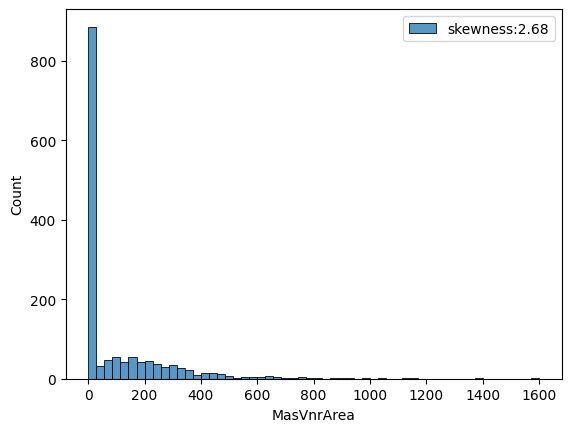

In [ ]:
# 查看MasVnrArea(磚石飾面面積（平方英尺）)分佈
MasVnrAreaPlot = sb.histplot(df_train['MasVnrArea'][df_train['MasVnrArea'].notnull()],label='skewness:%.2f'%(df_train['MasVnrArea'].skew()))
MasVnrAreaPlot.legend(loc='best')

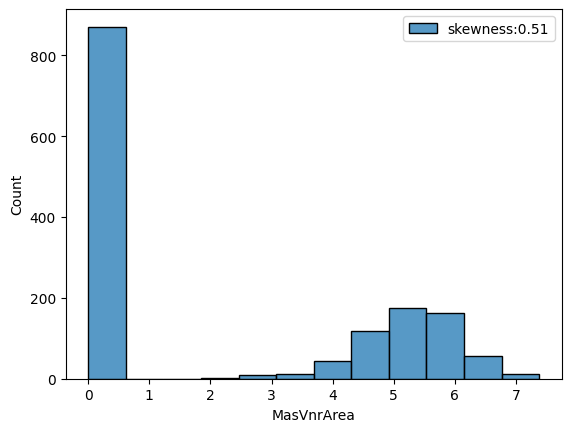

In [ ]:
# 對數化處理MasVnrArea值
df_train['MasVnrArea'] = df_train['MasVnrArea'].map(lambda x: np.log(x) if x>0 else 0)

# 查看MasVnrArea分佈
MasVnrAreaPlot = sb.histplot(df_train['MasVnrArea'][df_train['MasVnrArea'].notnull()],label='skewness:%.2f'%(df_train['MasVnrArea'].skew()))
MasVnrAreaPlot.legend(loc='best')

# 結論: 調整後的圖形較為合理

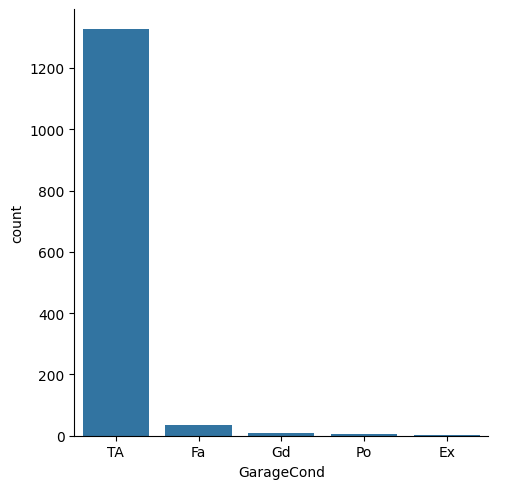

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='GarageCond',kind='count')

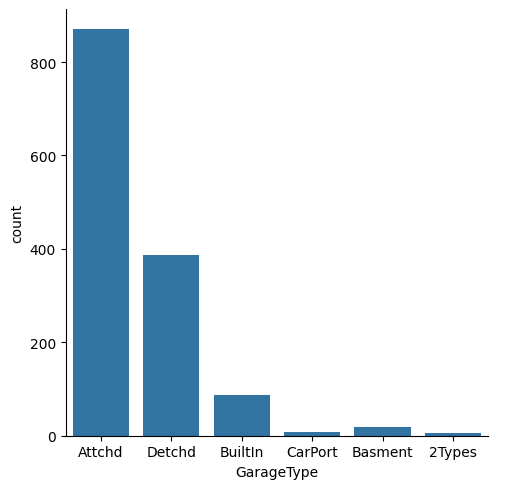

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='GarageType',kind='count')

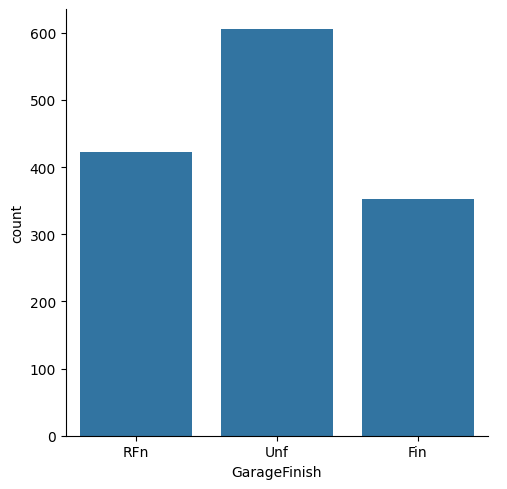

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='GarageFinish',kind='count')

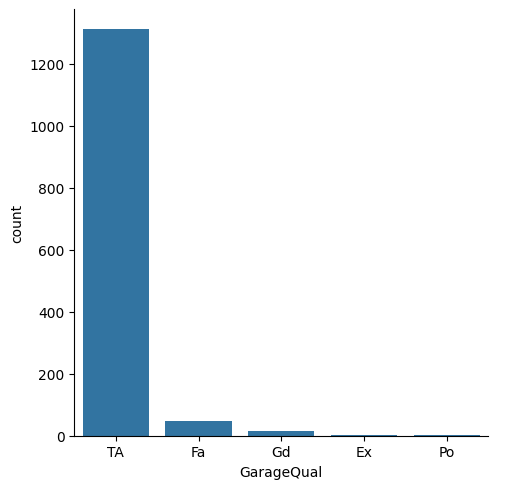

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='GarageQual',kind='count')

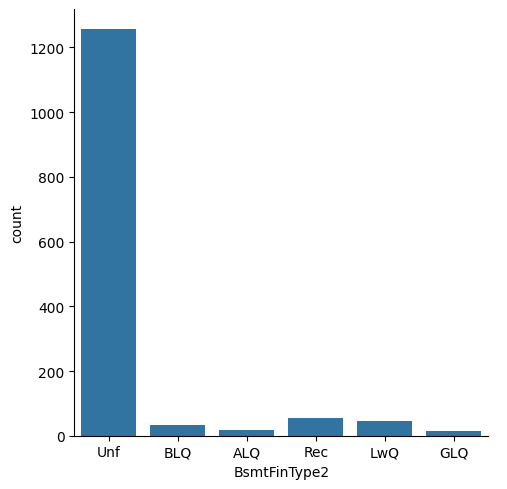

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='BsmtFinType2',kind='count')

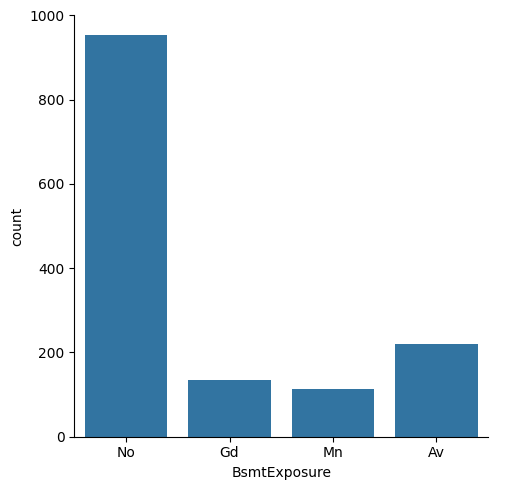

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='BsmtExposure',kind='count')

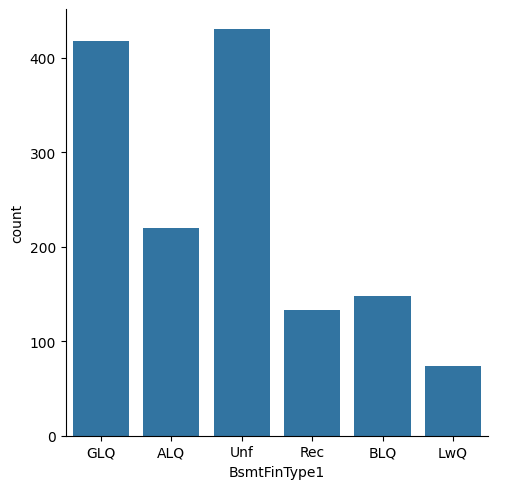

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='BsmtFinType1',kind='count')

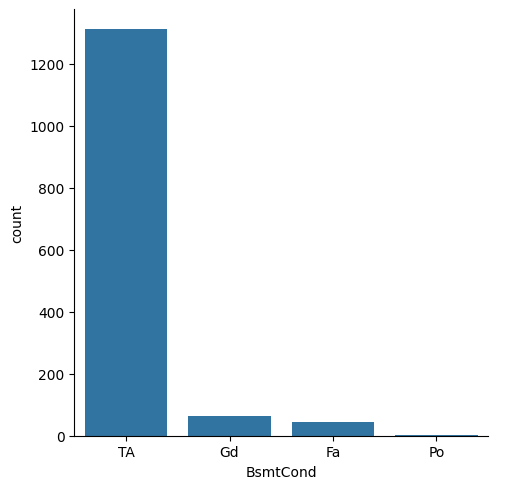

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='BsmtCond',kind='count')

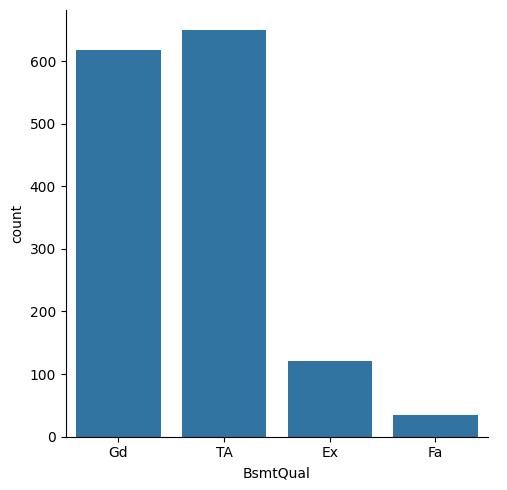

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='BsmtQual',kind='count')

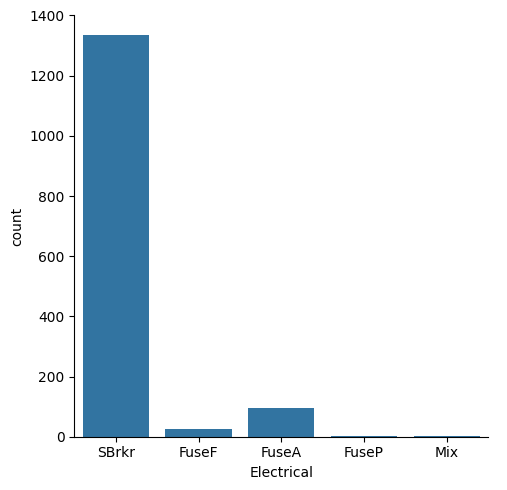

In [ ]:
# 類別型資料，等等用眾數填充缺失值
sb.catplot(data=df_train,x='Electrical',kind='count')

In [ ]:
# 把要用眾數填充的特徵加入群組
columns = ['GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2'
            ,'BsmtExposure','BsmtFinType1','BsmtCond', 'BsmtQual', 'Electrical',]


# 類別型的資料，缺失通過.mode()填補眾數
for column in columns:
    # 填充的空值 = 用.mode()取得dataform眾數後，再用[0]取值(因為沒取值之前是DataFrame形式)
    df_train[column] = df_train[column].fillna(df_train[column].mode()[0])


# 已無缺失值
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# 3.特徵工程

In [ ]:
# 實際經驗告訴我們，房子的所有實用面積，會對房價產生最大程度的影響，所以在這裡創建一個新面積的特徵TotalSF
# TotalBsmtSF(地下室面積總平方英尺)+1stFlrSF(一樓平方英尺)+2ndFlrSF(二樓平方英尺)=TotalSF(全部可用面積)
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

df_train['TotalSF']

,TotalSF
0,2566
1,2524
2,2706
3,2473
4,3343
...,...
1455,2600
1456,3615
1457,3492
1458,2156


In [ ]:
# 大部分的模型都是基於數學運算，字串(object)無法套入數學模型進行運算，先提取出來等等做轉換
# 提取dtypes為object的目錄
object_cols = df_train.dtypes[df_train.dtypes == "object"].index

# 顯示dtypes為object的目錄
object_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# 從sklearn library中導入 LabelEncoder對資料進行fit及transform並取代之。
from sklearn.preprocessing import LabelEncoder


for col in object_cols:
    label = LabelEncoder()
    df_train[col] = label.fit_transform(df_train[col])

# 此時已經沒有object的Dtype
df_train.info(verbose=False) # 簡潔顯示verbose=False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 76 entries, Id to TotalSF
dtypes: float64(3), int64(73)
memory usage: 867.0 KB


In [ ]:
# 接下來分析偏度並做出修正，使非常態分佈的資料更接近常態分佈，提高模型預測的準確性
# 價格和ID的部分不做偏度調整，所以先提取出來
noSalePrice_cols = df_train.columns[(df_train.columns != 'SalePrice') & (df_train.columns != 'Id')]
noSalePrice_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

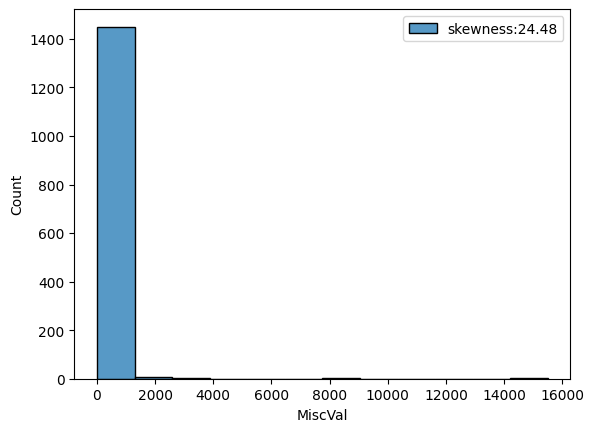

In [ ]:
# 引入skew函數來算偏度
from scipy.stats import skew
# 依序將每個df_train[feats_numeric]傳遞給skew()
# sort_values()函数排序用途 ascending預設為True，即升序排列
data_skewness = pd.DataFrame({'Skew' :df_train[noSalePrice_cols].apply(lambda x: skew(x)).sort_values(ascending=False)})

# 偏度絕對值大於0.75的視為偏度過大
data_skewness = data_skewness[abs(data_skewness) > 0.75]

# 查看MiscVal($雜項功能的值)分佈(此為其中一個舉例)
# 偏度為24.48
MiscValPlot = sb.histplot(df_train['MiscVal'][df_train['MiscVal'].notnull()],label='skewness:%.2f'%(df_train['MiscVal'].skew()))
MiscValPlot.legend(loc='best')

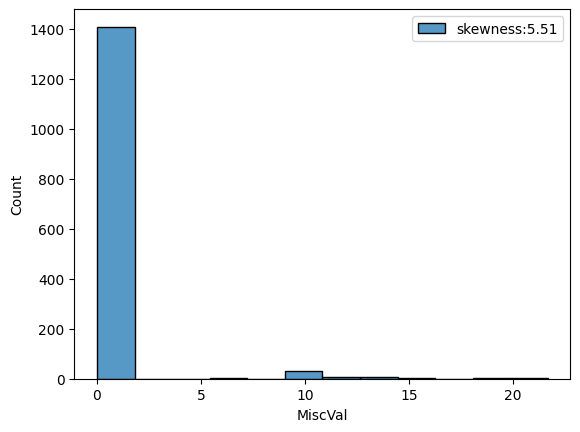

In [ ]:
# Box-Cox變換是一種用於資料轉換的方法，旨在使非常態分佈的資料更接近常態分佈，提高模型預測的準確性
# 這裡用boxcox1p函數來實現Box-Cox變換
from scipy.special import boxcox1p

# 將偏度較大的特徵(feature)行取出來為
feats_skewed = data_skewness.index

lam = 0.15 # 功率參數
for feat in feats_skewed:
    df_train[feat] = boxcox1p(df_train[feat], lam)



# 查看MiscVal($雜項功能的值)分佈(此為其中一個舉例)
# 偏度有所下降為5.51
MiscValPlot = sb.histplot(df_train['MiscVal'][df_train['MiscVal'].notnull()],label='skewness:%.2f'%(df_train['MiscVal'].skew()))
MiscValPlot.legend(loc='best')

# 4.相關性分析

In [ ]:
# 現在object被int64取代且偏度問題也縮小，來篩選相關性高的特徵

# 創建一個相關性的DataFrame
corrDf = pd.DataFrame()

# 只選df_train.corr()['SalePrice']中的相關性的絕對值大於0.5的加入DataFrame
corrDf = df_train.corr()['SalePrice'][abs(df_train.corr()['SalePrice']) > 0.5]

# 查看各特徵與標籤的相關性
corrDf

,SalePrice
OverallQual,0.755529
YearBuilt,0.520927
YearRemodAdd,0.506887
ExterQual,-0.615229
BsmtQual,-0.616104
1stFlrSF,0.596337
GrLivArea,0.700503
FullBath,0.541848
KitchenQual,-0.580369
TotRmsAbvGrd,0.525068


In [ ]:
# 提取高相關性的特徵
train_Sel = df_train[corrDf.index]

# 查看有哪些特徵行，並存起來
# 因為這裡資料較多，所以相關性分析可信度較高(之後測試集直接從這裡拿取高相關性的特徵行)
train_Sel_columns = train_Sel.columns

# 顯示提取的dataframe
train_Sel

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageCars,SalePrice,TotalSF
0,2.440268,14.187527,14.187527,1.194318,1.194318,11.692623,13.698888,1.194318,1.194318,2.602594,14.187527,0.730463,1.194318,208500,14.976591
1,2.259674,14.145138,14.145138,1.540963,1.194318,12.792276,12.792276,1.194318,1.540963,2.259674,14.145138,0.730463,1.194318,181500,14.923100
2,2.440268,14.184404,14.185966,1.194318,1.194318,11.892039,13.832085,1.194318,1.194318,2.259674,14.184404,0.730463,1.194318,223500,15.149678
3,2.440268,14.047529,14.135652,1.540963,1.540963,12.013683,13.711364,0.730463,1.194318,2.440268,14.179714,1.194318,1.540963,140000,14.857121
4,2.602594,14.182841,14.182841,1.194318,1.194318,12.510588,14.480029,1.194318,1.194318,2.750250,14.182841,0.730463,1.540963,250000,15.852312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.259674,14.181278,14.182841,1.540963,1.194318,11.990298,13.584606,1.194318,1.540963,2.440268,14.181278,0.730463,1.194318,175000,15.019350
1456,2.259674,14.148295,14.164038,1.540963,1.194318,14.295205,14.295205,1.194318,1.540963,2.440268,14.148295,1.194318,1.194318,210000,16.118017
1457,2.440268,14.089451,14.192207,0.000000,1.540963,12.616840,14.679454,1.194318,1.194318,2.750250,14.089451,0.730463,0.730463,266500,16.000045
1458,2.055642,14.103852,14.176584,1.540963,1.540963,12.338074,12.338074,0.730463,1.194318,2.055642,14.103852,1.194318,0.730463,142125,14.418948


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'OverallQual'),
  Text(0, 1.5, 'YearBuilt'),
  Text(0, 2.5, 'YearRemodAdd'),
  Text(0, 3.5, 'ExterQual'),
  Text(0, 4.5, 'BsmtQual'),
  Text(0, 5.5, '1stFlrSF'),
  Text(0, 6.5, 'GrLivArea'),
  Text(0, 7.5, 'FullBath'),
  Text(0, 8.5, 'KitchenQual'),
  Text(0, 9.5, 'TotRmsAbvGrd'),
  Text(0, 10.5, 'GarageYrBlt'),
  Text(0, 11.5, 'GarageFinish'),
  Text(0, 12.5, 'GarageCars'),
  Text(0, 13.5, 'SalePrice'),
  Text(0, 14.5, 'TotalSF')])

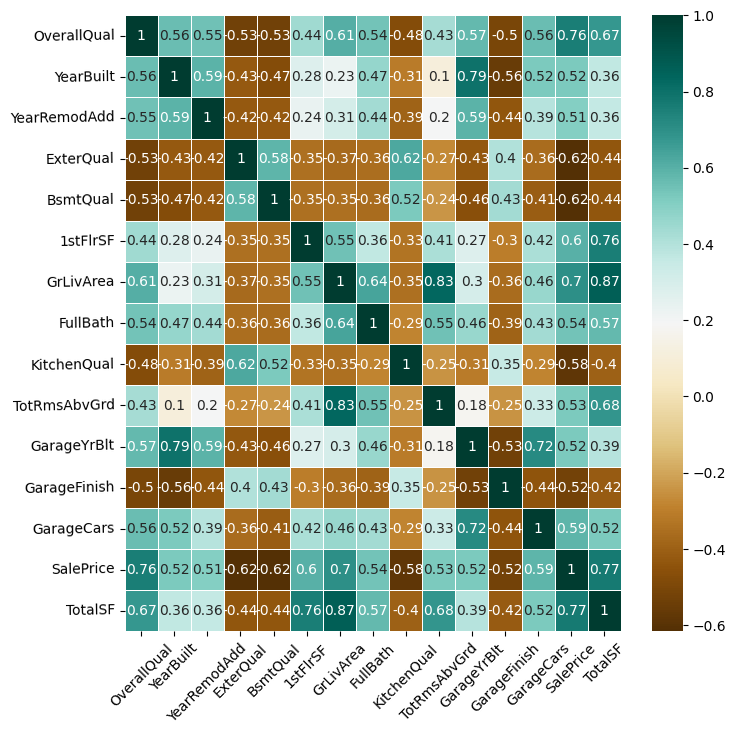

In [ ]:
# 熱力圖，查看SalePrice與其他特徵間相關性大小

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8)) # 設定視窗尺寸

# 設定視窗尺寸data.corr()表示了data中的兩個變數之間的相關性，取值範圍為[-1,1],取值接近-1，表示反相關，類似反比例函數，取值接近1，表正相關。
sb.heatmap(train_Sel.corr(),cmap='BrBG',annot=True,linewidths=.5) # cmap:顏色 annot:格子裡面要不要填充值 linewidths:線條寬度

plt.xticks(fontsize=10,rotation=45) # 文字大小，旋轉角度
plt.yticks(fontsize=10,rotation=1)  # 文字大小，旋轉角度

In [ ]:
# 把不是SalePrice的特徵列拿出來
noSalePrice_train_Sel = train_Sel.columns[train_Sel.columns != 'SalePrice']

# 在train_Sel中找到noSalePrice_train_Sel的特徵列，編成DataFrame
noSalePrice_train_Sel = train_Sel[noSalePrice_train_Sel]

# 得到沒有SalePrice的高相關度特徵
noSalePrice_train_Sel

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageCars,TotalSF
0,2.440268,14.187527,14.187527,1.194318,1.194318,11.692623,13.698888,1.194318,1.194318,2.602594,14.187527,0.730463,1.194318,14.976591
1,2.259674,14.145138,14.145138,1.540963,1.194318,12.792276,12.792276,1.194318,1.540963,2.259674,14.145138,0.730463,1.194318,14.923100
2,2.440268,14.184404,14.185966,1.194318,1.194318,11.892039,13.832085,1.194318,1.194318,2.259674,14.184404,0.730463,1.194318,15.149678
3,2.440268,14.047529,14.135652,1.540963,1.540963,12.013683,13.711364,0.730463,1.194318,2.440268,14.179714,1.194318,1.540963,14.857121
4,2.602594,14.182841,14.182841,1.194318,1.194318,12.510588,14.480029,1.194318,1.194318,2.750250,14.182841,0.730463,1.540963,15.852312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.259674,14.181278,14.182841,1.540963,1.194318,11.990298,13.584606,1.194318,1.540963,2.440268,14.181278,0.730463,1.194318,15.019350
1456,2.259674,14.148295,14.164038,1.540963,1.194318,14.295205,14.295205,1.194318,1.540963,2.440268,14.148295,1.194318,1.194318,16.118017
1457,2.440268,14.089451,14.192207,0.000000,1.540963,12.616840,14.679454,1.194318,1.194318,2.750250,14.089451,0.730463,0.730463,16.000045
1458,2.055642,14.103852,14.176584,1.540963,1.540963,12.338074,12.338074,0.730463,1.194318,2.055642,14.103852,1.194318,0.730463,14.418948


# 5.訓練模型

In [ ]:
# 設定特徵data_X
data_X = noSalePrice_train_Sel

# 檢查訓練集特徵值與目標值是否能對上
data_X.shape

(1460, 14)

In [ ]:
# 設定目標值data_y
data_y = df_train['SalePrice']

# 檢查訓練集特徵值與目標值是否能對上
data_y.shape

(1460,)

In [ ]:
# RMSE是常用於衡量模型預測值或估計量（樣本值或母體值）與觀測值之間差異的一種指標，越小差距越小就越好。
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
# 嘗試各種演算法，包括Logistic迴歸，決策樹，隨機森林，KNN和SVC。比較出更好的模型得分和模型rmse


# Logistic迴歸
from sklearn.linear_model import LogisticRegression
# 在 sklearn 中，設定參數 max_iter 最大迭代次數來取代步長，它幫助我們控制模型的迭代速度並適時地讓模型停下來。
# max_iter 越大，代表步長越小，模型迭代時間越長(可以迭代很多次，代表每一次可以走很小步，但也會花很久才走到)
# max_iter 越小，代表步長越大，模型迭代時間越短(只能迭代很少次，代表每一次必須走很大步，但也會很快就能走到)
# 預設值在這裡沒有辦法很好收斂，所以用1000
logreg = LogisticRegression(max_iter=1000)

logreg.fit(data_X, data_y)

# 模型得分
model_Score = logreg.score(data_X, data_y)
print("Logreg Model Score %.2f" % model_Score)

# 模型rmse
data_X_predict_y = logreg.predict(data_X)
rmse_Score = rmse(data_y,data_X_predict_y)
print("Logreg Rmse Score %.2f" % rmse_Score)


# 決策樹
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(data_X, data_y)

# 模型得分
model_Score = dtree.score(data_X, data_y)
print("DTree Model Score %.2f" % model_Score)

# 模型rmse
data_X_predict_y = dtree.predict(data_X)
rmse_Score = rmse(data_y,data_X_predict_y)
print("DTree Rmse Score %.2f" % rmse_Score)


# 隨機森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(data_X, data_y)

# 模型得分
model_Score = rf.score(data_X, data_y)
print("Random Forest Model Score %.2f" % model_Score)

# 模型rmse
data_X_predict_y = rf.predict(data_X)
rmse_Score = rmse(data_y,data_X_predict_y)
print("Random Forest Rmse Score %.2f" % rmse_Score)


# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data_X, data_y)

# 模型得分
model_Score = knn.score(data_X, data_y)
print("Knn Model Score %.2f" % model_Score)

# 模型rmse
data_X_predict_y = knn.predict(data_X)
rmse_Score = rmse(data_y,data_X_predict_y)
print("knn Rmse Score %.2f" % rmse_Score)


# SVC
from sklearn.svm import SVC
svc = SVC()

svc.fit(data_X, data_y)

# 模型得分
model_Score = svc.score(data_X, data_y)
print("Svc Model Score %.2f" % model_Score)

# 模型rmse
data_X_predict_y = svc.predict(data_X)
rmse_Score = rmse(data_y,data_X_predict_y)
print("svc Rmse Score %.2f" % rmse_Score)

Logreg Model Score 0.07
Logreg Rmse Score 46031.07
DTree Model Score 0.99
DTree Rmse Score 1161.07
Random Forest Model Score 0.99
Random Forest Rmse Score 1127.30
Knn Model Score 0.99
knn Rmse Score 1127.30
Svc Model Score 0.01
svc Rmse Score 89338.31


# 1.讀取資料

In [ ]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_HousingPricesPrediction/main/home-data-for-ml-course/test.csv'

df_test = pd.read_csv(df_test_url)

df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [ ]:
print('測試資料大小:',df_test.shape)

測試資料大小: (1459, 80)


# 2.數據清洗

In [ ]:
# 資料過少參考價值不足，所以先刪除
df_test = df_test.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1)

# 再查看有那些缺值
missing_df_test = pd.DataFrame({'Missing Number': df_test.isnull().sum().sort_values(ascending=False)})
missing_df_test = missing_df_test.drop(missing_df_test[missing_df_test['Missing Number']==0].index)

missing_df_test

,Missing Number
LotFrontage,227
GarageYrBlt,78
GarageFinish,78
GarageQual,78
GarageCond,78
GarageType,76
BsmtCond,45
BsmtQual,44
BsmtExposure,44
BsmtFinType1,42


In [ ]:
# 對LotFrontage缺失值進行處理，利用60填充缺失值
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(60)
df_test['LotFrontage'].head()

,LotFrontage
0,80.0
1,81.0
2,74.0
3,78.0
4,43.0


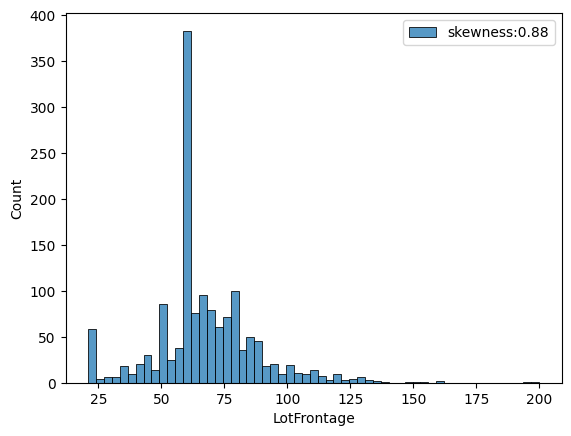

In [ ]:
# 查看LotFrontage分佈
test_LotFrontagePlot = sb.histplot(df_test['LotFrontage'][df_test['LotFrontage'].notnull()],label='skewness:%.2f'%(df_test['LotFrontage'].skew()))
test_LotFrontagePlot.legend(loc='best')

# 微偏態

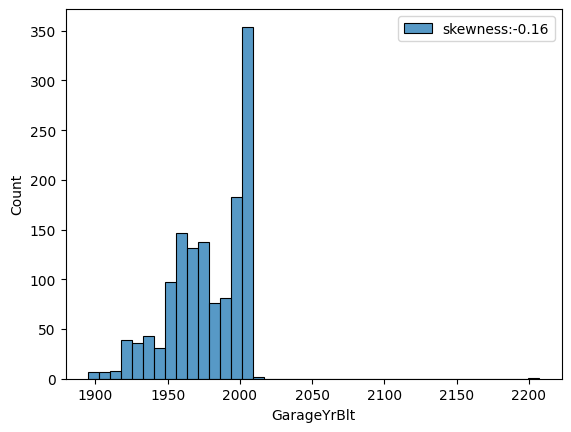

In [ ]:
# 查看GarageYrBlt分佈
test_GarageYrBltPlot = sb.histplot(df_test['GarageYrBlt'][df_test['GarageYrBlt'].notnull()],label='skewness:%.2f'%(df_test['GarageYrBlt'].skew()))
test_GarageYrBltPlot.legend(loc='best')

# 微偏態

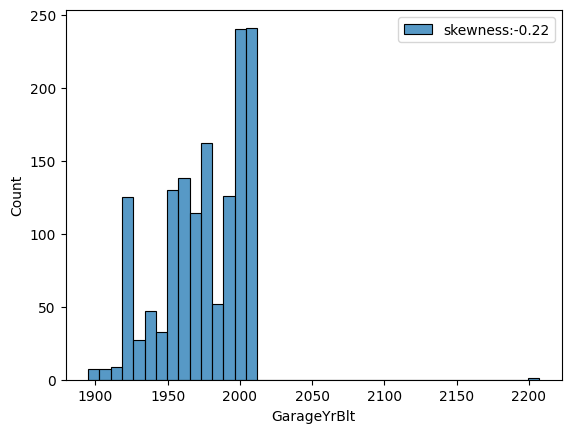

In [ ]:
# 推測GarageYrBlt(車庫建成年份)遺失可能原因為年代久遠，因此補值一個久遠一點的年份1920
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(1920)


# 查看GarageYrBlt分佈
test_GarageYrBltPlot = sb.histplot(df_test['GarageYrBlt'][df_test['GarageYrBlt'].notnull()],label='skewness:%.2f'%(df_test['GarageYrBlt'].skew()))
test_GarageYrBltPlot.legend(loc='best')

In [ ]:
# 查看MasVnrArea(磚石飾面面積（平方英尺）)分佈狀況
df_test['MasVnrArea'].value_counts()

# 0占大多數，所以用0填充缺值

,count
MasVnrArea,
0.0,877
176.0,10
144.0,9
120.0,8
216.0,8
...,...
647.0,1
1290.0,1
495.0,1


In [ ]:
# 對MasVnrArea缺失值進行處理，利用0填充缺失值
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['MasVnrArea'].head()

,MasVnrArea
0,0.0
1,108.0
2,0.0
3,20.0
4,0.0


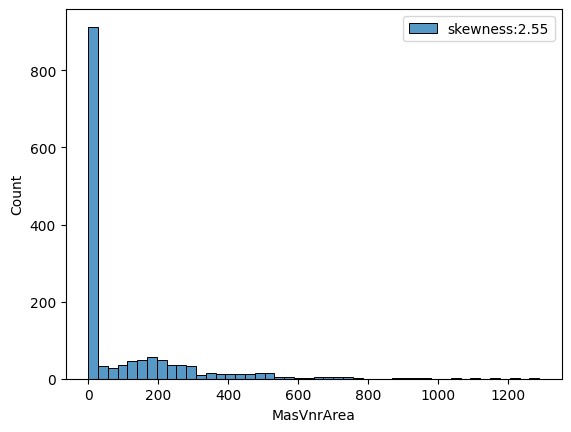

In [ ]:
# 查看MasVnrArea(磚石飾面面積（平方英尺）)分佈
test_MasVnrAreaPlot = sb.histplot(df_test['MasVnrArea'][df_test['MasVnrArea'].notnull()],label='skewness:%.2f'%(df_test['MasVnrArea'].skew()))
test_MasVnrAreaPlot.legend(loc='best')

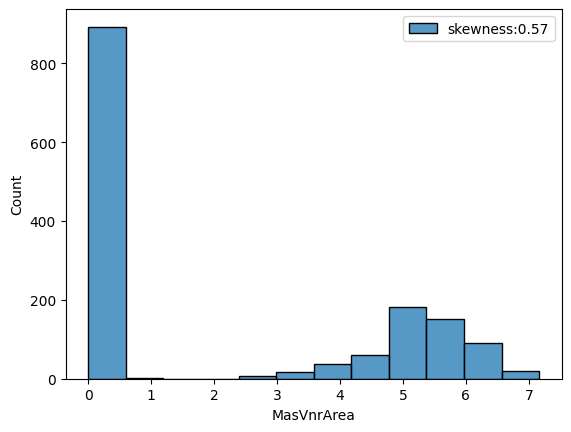

In [ ]:
# 對數化處理MasVnrArea值
df_test['MasVnrArea'] = df_test['MasVnrArea'].map(lambda x: np.log(x) if x>0 else 0)

# 查看MasVnrArea分佈
test_MasVnrAreaPlot = sb.histplot(df_test['MasVnrArea'][df_test['MasVnrArea'].notnull()],label='skewness:%.2f'%(df_test['MasVnrArea'].skew()))
test_MasVnrAreaPlot.legend(loc='best')

# 結論: 調整後的圖形較為合理

In [ ]:
# 再查看有那些特徵缺值總和大於0
missing_test = df_test.columns[df_test.isnull().sum() > 0]

missing_test

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

In [ ]:
# 把要用眾數填充的特徵加入群組
columns = missing_test


# 類別型的資料，缺失通過.mode()填補眾數
for column in columns:
    # 填充的空值 = 用.mode()取得dataform眾數後，再用[0]取值(因為沒取值之前是DataFrame形式)
    df_test[column] = df_test[column].fillna(df_test[column].mode()[0])


# 已無缺失值
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# 3.特徵工程

In [ ]:
# 實際經驗告訴我們，房子的所有實用面積，會對房價產生最大程度的影響，所以在這裡創建一個新面積的特徵TotalSF
# TotalBsmtSF(地下室面積總平方英尺)+1stFlrSF(一樓平方英尺)+2ndFlrSF(二樓平方英尺)=TotalSF(全部可用面積)
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

df_test['TotalSF']

,TotalSF
0,1778.0
1,2658.0
2,2557.0
3,2530.0
4,2560.0
...,...
1454,1638.0
1455,1638.0
1456,2448.0
1457,1882.0


In [ ]:
# 大部分的模型都是基於數學運算，字串(object)無法套入數學模型進行運算，先提取出來等等做轉換
# 提取dtypes為object的目錄
test_object_cols = df_test.dtypes[df_test.dtypes == "object"].index

# 顯示dtypes為object的目錄
test_object_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# 從sklearn library中導入 LabelEncoder對資料進行fit及transform並取代之。
from sklearn.preprocessing import LabelEncoder


for col in test_object_cols:
    label = LabelEncoder()
    df_test[col] = label.fit_transform(df_test[col])

# 此時已經沒有object的Dtype
df_test.info(verbose=False) # 簡潔顯示verbose=False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 75 entries, Id to TotalSF
dtypes: float64(12), int64(63)
memory usage: 855.0 KB


In [ ]:
# 接下來分析偏度並做出修正，使非常態分佈的資料更接近常態分佈，提高模型預測的準確性
# ID的部分不做偏度調整，所以先提取出來
test_noSalePrice_cols = df_test.columns[df_test.columns != 'Id']
test_noSalePrice_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

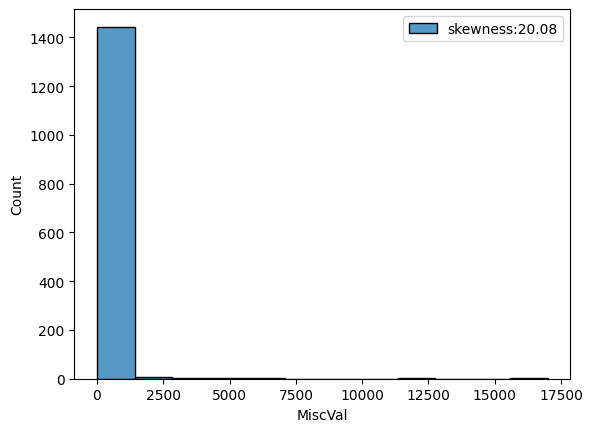

In [ ]:
# 引入skew函數來算偏度
from scipy.stats import skew
# 依序將每個df_test[feats_numeric]傳遞給skew()
# sort_values()函数排序用途 ascending預設為True，即升序排列
test_data_skewness = pd.DataFrame({'Skew' :df_test[test_noSalePrice_cols].apply(lambda x: skew(x)).sort_values(ascending=False)})

# 偏度絕對值大於0.75的視為偏度過大
test_data_skewness = test_data_skewness[abs(test_data_skewness) > 0.75]

# 查看MiscVal($雜項功能的值)分佈(此為其中一個舉例)
# 偏度為20.08
test_MiscValPlot = sb.histplot(df_test['MiscVal'][df_test['MiscVal'].notnull()],label='skewness:%.2f'%(df_test['MiscVal'].skew()))
test_MiscValPlot.legend(loc='best')

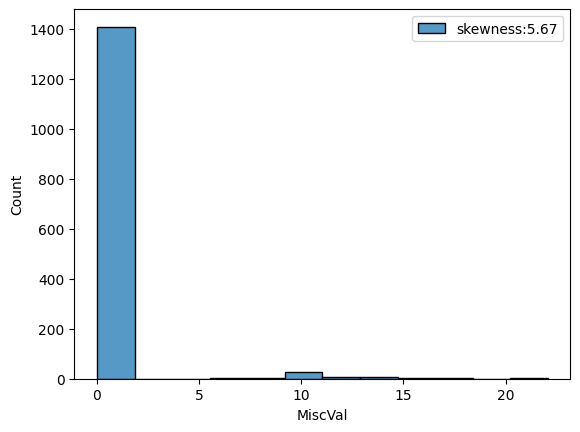

In [ ]:
# Box-Cox變換是一種用於資料轉換的方法，旨在使非常態分佈的資料更接近常態分佈，提高模型預測的準確性
# 這裡用boxcox1p函數來實現Box-Cox變換
from scipy.special import boxcox1p

# 將偏度較大的特徵行取出來
test_feats_skewed = test_data_skewness.index

lam = 0.15 # 功率參數
for feat in test_feats_skewed:
    df_test[feat] = boxcox1p(df_test[feat], lam)



# 查看MiscVal($雜項功能的值)分佈(此為其中一個舉例)
# 偏度有所下降為5.67
test_MiscValPlot = sb.histplot(df_test['MiscVal'][df_test['MiscVal'].notnull()],label='skewness:%.2f'%(df_test['MiscVal'].skew()))
test_MiscValPlot.legend(loc='best')

# 4.相關性分析

In [ ]:
# 取得高相關性的特徵資料

# 刪除train_Sel_columns中的SalePrice(這裡拿取訓練集選中的特徵行)
# 把剩下的特徵行提取成一個Dataform
noSalePrice_test_Sel = df_test[train_Sel_columns.drop('SalePrice')]

# 取得高相關性的特徵資料
noSalePrice_test_Sel

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageCars,TotalSF
0,2.055642,14.121376,14.121376,1.540963,1.540963,11.818680,11.818680,0.730463,1.540963,2.055642,14.121376,1.194318,0.730463,13.818294
1,2.259674,14.116605,14.116605,1.540963,1.540963,12.943735,12.943735,0.730463,1.194318,2.259674,14.116605,1.194318,0.730463,15.091209
2,2.055642,14.178149,14.179714,1.540963,1.194318,11.916131,13.551272,1.194318,1.540963,2.259674,14.178149,0.000000,1.194318,14.965191
3,2.259674,14.179714,14.179714,1.540963,1.540963,11.910125,13.504453,1.194318,1.194318,2.440268,14.179714,0.000000,1.194318,14.930788
4,2.602594,14.170316,14.170316,1.194318,1.194318,12.833625,12.833625,1.194318,1.194318,2.055642,14.170316,0.730463,1.194318,14.968995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.820334,14.135652,14.135652,1.540963,1.540963,10.496872,12.374860,0.730463,1.540963,2.055642,14.055628,1.194318,0.000000,13.567978
1455,1.820334,14.135652,14.135652,1.540963,1.540963,10.496872,12.374860,0.730463,1.540963,2.259674,14.135652,1.194318,0.730463,13.567978
1456,2.055642,14.119786,14.176584,1.540963,1.540963,12.703313,12.703313,0.730463,1.540963,2.440268,14.119786,1.194318,1.194318,14.824355
1457,2.055642,14.170316,14.170316,1.540963,1.194318,12.039794,12.039794,0.730463,1.540963,2.259674,14.055628,1.194318,0.000000,13.993617


# 5.訓練模型


In [ ]:
# 設定特徵資料為preData_X
test_preData_X = noSalePrice_test_Sel

# 檢查測試集特徵值與訓練集特徵值是否能對上
test_preData_X.shape

(1459, 14)

In [ ]:
# Random Forest

# rf開始預測
test_rf_y = rf.predict(test_preData_X)


# 導出預測結果
test_rfDf = pd.DataFrame()
test_rfDf['Id'] = df_test['Id']
test_rfDf['SalePrice'] = test_rf_y

# 顯示預測結果
test_rfDf

,Id,SalePrice
0,1461,109500
1,1462,130000
2,1463,181000
3,1464,181000
4,1465,180000
...,...,...
1454,2915,88000
1455,2916,75000
1456,2917,98600
1457,2918,93500


In [ ]:
# 將預測結果導出為csv文件
test_rfDf.to_csv('./HousingPricesrf.csv',index=False)